机器学习


人工智能三大概念：AI 机器学习（ML）和深度学习（DL）

In [ ]:
import sklearn

机器学习建模流程:
1.

KNN算法

In [1]:
#1.导包
from sklearn.neighbors import KNeighborsClassifier
#2.准备数据集
x_train=[[0],[1],[2],[3]]
y_train=[0,0,1,1]
x_test=[[5]]
#3.创建模型
model=KNeighborsClassifier(n_neighbors=2)
#4.模型训练
model.fit(x_train,y_train)
#5.模型预测
y_pre=model.predict(x_test)
print(y_pre)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#1.导包
from sklearn.neighbors import KNeighborsRegressor
#2.准备数据集
x_train=[[0,0,1],[1,1,0],[3,10,10],[4,11,12]]
y_train=[0.1,0.2,0.3,0.4]
x_test=[[3,10,11]]
#3.创建模型
model=KNeighborsRegressor(n_neighbors=2)
#4.模型训练
model.fit(x_train,y_train)
#5.模型预测
y_pre=model.predict(x_test)
print(y_pre)

特征与处理之归一化操作（x=(当前值-min)/(max-min)）(处理小数据集适用 容易受到最大值最小值影响)

In [2]:
from sklearn.preprocessing import MinMaxScaler
x_train=[[90,2,10,40],[60,4,15,45],[75,3,13,46]]
#2.创建归一化对象
scaler=MinMaxScaler(feature_range=(0,1))
#3.队员数据集进行归一化操作
x_train_new=scaler.fit_transform(x_train)
print(x_train_new)


ModuleNotFoundError: No module named 'sklearn'

数据标准化 结果=(x-mean)/标准差(都是为了解决量纲问题)



In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_train=[[90,2,10,40],[60,4,15,45],[75,3,13,46]]
#2.创建标准化化对象
scaler=StandardScaler()
#3.队员数据集进行归一化操作
x_train_new=scaler.fit_transform(x_train)
print(x_train_new)
print(f'数据集的均值:{scaler.mean_}')

利用KNN算法对鸢尾花进行分类
1.加载数据
2.数据预处理
3.特征工程
4.模型训练
5.模型评估
6.模型预测


In [ ]:
# 导入类库
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error, precision_score


#1.定义函数 加载鸢尾花数据集并查看数据集
def dm01_loadris():
    #1.加载鸢尾花数据集
    iris_data=load_iris()
    #2.查看数据集
    print(f'数据集:{iris_data}')
    print(f'数据集类型{type(iris_data)}')
    #3.查看所有键
    print(f'查看数据集所有键{iris_data.keys()}')
    print(iris_data.target_names)
    print(iris_data.feature_names)
    print(iris_data.filename)

#2.定义函数，绘制数据集散点图
def dm02_show_iris():
    iris_data=load_iris()
    #2.把鸢尾花数据转化为Dataframe
    iris_df=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    #3.给df搞标签列
    iris_df['labels']=iris_data.target
    print(iris_df)
    #4.绘制散点图
    sns.lmplot(data=iris_df,x='sepal length (cm)',y='sepal width (cm)',hue='labels',fit_reg=False)
    #5.设置标题
    plt.title('iris data')
    plt.tight_layout()
    plt.show()
#3.切分训练集测试集

def dm03_split_train_test():
    iris_data=load_iris()
    x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=42)
    print(x_train,x_test,y_train,y_test,len(x_train),len(x_test),len(y_train),len(y_test))
#4.实现鸢尾花完整案例 收集数据 预处理 标准化 模型训练 评估 预测
def dm04_iris_evaluate_test():
    #1.加载数据
    iris_data=load_iris()
    #2.数据预处理
    x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=42)
    #3.特征工程
    #思考1：特征都是用的不用选
    #思考二：特征预处理：因为原数据差别不大 无需预处理 但更完善
    #3.1创建标准化
    transfer=StandardScaler()
    #3.2对特征列进行标准化
    #fit_transform 兼具fit和transform功能 即：训练 转换 该函数适用于：第一次进行标准化的时候，一般用于处理训练集

    x_train=transfer.fit_transform(x_train)
    #transform 只有转化 该函数适用于 重复进行标准化动作 一般用于对测试集进行标准化
    x_test=transfer.transform(x_test)
    #4.模型训练
    #4.1创建模型对象
    estimator=KNeighborsClassifier(n_neighbors=3)
    #4.2训练
    estimator.fit(x_train,y_train)

    #5.模型预测
    #场景一：切分的测试集
    y_pre=estimator.predict(x_test)
    print(y_pre)
    #场景二：对新的数据集搞
    my_data=[[7.8,2.1,3.9,1.6]]
    #shujuji标准化
    my_data=transfer.transform(my_data)
    y_pre_new=estimator.predict(my_data)
    print(y_pre_new)
    #5.4查看上述数据集每种分类的概率
    y_pre_proba=estimator.predict_proba(my_data)
    print(y_pre_proba)
    #6.模型预测
    #方式1：直接评分 基于测试机的标签 训练集的标签
    print(f'正确率:{estimator.score(x_test,y_test)}')
    #方式2：基于测试机的标签和预测结果进行评分
    print(f'正确率：{accuracy_score(y_test,y_pre)}')

#5.测试
if __name__ == '__main__':
    dm01_loadris()
    dm02_show_iris()
    dm03_split_train_test()
    dm04_iris_evaluate_test()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#1.定义函数 加载鸢尾花数据集并查看数据集
def dm01_loadris():
    #1.加载鸢尾花数据集
    iris_data=load_iris()
    #2.查看数据集
    print(f'数据集:{iris_data}')
    print(f'数据集类型{type(iris_data)}')
    #3.查看所有键
    print(f'查看数据集所有键{iris_data.keys()}')
    print(iris_data.target_names)
    print(iris_data.feature_names)
    print(iris_data.filename)

#2.定义函数，绘制数据集散点图
def dm02_show_iris():
    iris_data=load_iris()
    #2.把鸢尾花数据转化为Dataframe
    iris_df=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    #3.给df搞标签列
    iris_df['labels']=iris_data.target
    print(iris_df)
    #4.绘制散点图
    sns.lmplot(data=iris_df,x='sepal length (cm)',y='sepal width (cm)',hue='labels',fit_reg=False)
    #5.设置标题
    plt.title('iris data')
    plt.tight_layout()
    plt.show()
#3.切分训练集测试集

def dm03_split_train_test():
    iris_data=load_iris()
    x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=42)
    print(x_train,x_test,y_train,y_test,len(x_train),len(x_test),len(y_train),len(y_test))
#4.实现鸢尾花完整案例 收集数据 预处理 标准化 模型训练 评估 预测
def dm04_iris_evaluate_test():
    #1.加载数据
    iris_data=load_iris()
    #2.数据预处理
    x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=42)
    #3.特征工程
    #思考1：特征都是用的不用选
    #思考二：特征预处理：因为原数据差别不大 无需预处理 但更完善
    #3.1创建标准化
    transfer=StandardScaler()
    #3.2对特征列进行标准化
    #fit_transform 兼具fit和transform功能 即：训练 转换 该函数适用于：第一次进行标准化的时候，一般用于处理训练集

    x_train=transfer.fit_transform(x_train)
    #transform 只有转化 该函数适用于 重复进行标准化动作 一般用于对测试集进行标准化
    x_test=transfer.transform(x_test)
    #4.模型训练
    #4.1创建模型对象
    estimator=KNeighborsClassifier()

    #使用交叉验证
    para_grid={'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}
    #创建Grid 找到最优参数
    #参一：要计算的模型对象
    #参二：该模型超参可能出现的值
    #参三：交叉验证的折数
    #返回值estimator：处理后的模型对象
    estimator=GridSearchCV(estimator=estimator,param_grid=para_grid,cv=4)
    #训练
    estimator.fit(x_train,y_train)
    print(f'最有评分:{estimator.best_score_}')
    print(estimator.best_params_)
    print(estimator.best_estimator_)
    print(estimator.cv_results_)

    #4.2训练
    estimator.fit(x_train,y_train)

    #5.模型预测
    #场景一：切分的测试集
    y_pre=estimator.predict(x_test)
    print(y_pre)
    #场景二：对新的数据集搞
    my_data=[[7.8,2.1,3.9,1.6]]
    #shujuji标准化
    my_data=transfer.transform(my_data)
    y_pre_new=estimator.predict(my_data)
    print(y_pre_new)
    #5.4查看上述数据集每种分类的概率
    y_pre_proba=estimator.predict_proba(my_data)
    print(y_pre_proba)
    #6.模型预测
    #方式1：直接评分 基于测试机的标签 训练集的标签
    print(f'正确率:{estimator.score(x_test,y_test)}')
    #方式2：基于测试机的标签和预测结果进行评分
    print(f'正确率：{accuracy_score(y_test,y_pre)}')
#模型评估

#5.测试
if __name__ == '__main__':
    dm01_loadris()
    dm02_show_iris()
    dm03_split_train_test()
    dm04_iris_evaluate_test()


手写数字识别

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib
from collections import Counter

def show_digit(idx):
    # 1 加载数据
    data = pd.read_csv('data/手写数字识别.csv')
    if idx < 0 or idx > len(data) - 1:
        return
    # 2 打印数据基本信息
    x = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    print('数据基本信息：', x.shape)
    print('类别数据比例：', Counter(y))

    print('当前数字的标签为：', y[idx])

    # 3 显示指定的图片 # data修改为ndarray 类型
    data_ = x.iloc[idx].values
    # 将数据形状修改为 28*28
    data_ = data_.reshape(28, 28)
    # 关闭坐标轴标签
    plt.axis('off')
    # 显示图像
    plt.imshow(data_, cmap='gray')
    plt.show()

def train_model():
    # 1 加载手写数字数据集
    data = pd.read_csv('data/手写数字识别.csv')

    # 2 数据预处理 归一化
    x = data.iloc[:, 1:] / 255
    y = data.iloc[:, 0]

    # 3 分割数据集
    split_data = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)
    x_train, x_test, y_train, y_test = split_data

    # 4 模型训练
    estimator = KNeighborsClassifier(n_neighbors=3)
    estimator.fit(x_train, y_train)

    # 5 模型评估
    acc = estimator.score(x_test, y_test)
    print('测试集准确率: %.2f' % acc)

    # 6 模型保存
    joblib.dump(estimator, 'model/knn.pth')

def test_model():
    # 1 读取图片数据
    img = plt.imread('data/demo.png')
    plt.imshow(img)

    # 2 加载模型
    knn = joblib.load('model/knn.pth')

    # 3 预测图片
    y_pred = knn.predict(img.reshape(1, -1))
    print('您绘制的数字是：', y_pred)


线性回归

In [ ]:
from sklearn.linear_model import LinearRegression
x_train=[[160],[166],[172],[174],[180]]
y_train=[56.3,60.6,65.1,68.5,75]
x_test=[[176]]
estimator=LinearRegression()
estimator.fit(x_train,y_train)
#可以查看下权重和斜率
print(estimator.coef_)
print(estimator.intercept_)

y_pred=estimator.predict(x_test)
print(y_pred)

In [86]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error
#银行信贷 梯度下降求解

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV

#波士顿房价预测
#1。加载数据
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# print(f'原始数据:{data.shape}')
# print(data[:5])
#2.数据的预处理
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
#3.特征工程
#3.1创建标准化对象
transfer=StandardScaler()
#3.2训练集标准化
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)
#4.模型训练
#4.1创建线性回归正规方程
estimator=LinearRegression(fit_intercept=True)
estimator.fit(x_train,y_train)
#4.2打印权重和偏置
print(f'权重{estimator.coef_}')
print(estimator.intercept_)

#5。模型预测
y_pre=estimator.predict(x_test)

#6.模型评估
print(f'均方误差：{mean_squared_error(y_test,y_pred)}')
print(f'均方根误差：{root_mean_squared_error(y_test,y_pred)}')
print(f'平均绝对误差：{mean_absolute_error(y_test,y_pred)}')






#梯度下降法
from sklearn.metrics import root_mean_squared_error
#银行信贷 梯度下降求解

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV

#波士顿房价预测
#1。加载数据
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# print(f'原始数据:{data.shape}')
# print(data[:5])
#2.数据的预处理
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
#3.特征工程
#3.1创建标准化对象
transfer=StandardScaler()
#3.2训练集标准化
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)
#4.模型训练
#4.1创建线性回归正规方程
estimator=SGDRegressor(fit_intercept=True,learning_rate='constant',max_iter=10000,eta0=0.01)
estimator.fit(x_train,y_train)
#4.2打印权重和偏置
print(f'权重{estimator.coef_}')
print(estimator.intercept_)

#5。模型预测
y_pre=estimator.predict(x_test)

#6.模型评估
print(f'均方误差：{mean_squared_error(y_test,y_pred)}')
print(f'均方根误差：{root_mean_squared_error(y_test,y_pred)}')
print(f'平均绝对误差：{mean_absolute_error(y_test,y_pred)}')







权重[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
22.796534653465375
均方误差：24.29111947497351
均方根误差：4.928602182665336
平均绝对误差：3.189091965887848
权重[-1.30265635  0.47236238  0.25931148  0.9356042  -1.85971289  2.79419214
 -0.17396056 -3.14958323  2.0730335  -1.88722886 -2.1085426   0.95979028
 -3.95636082]
[23.05961373]
均方误差：24.29111947497351
均方根误差：4.928602182665336
平均绝对误差：3.189091965887848


myret--> 3.0750025765636577


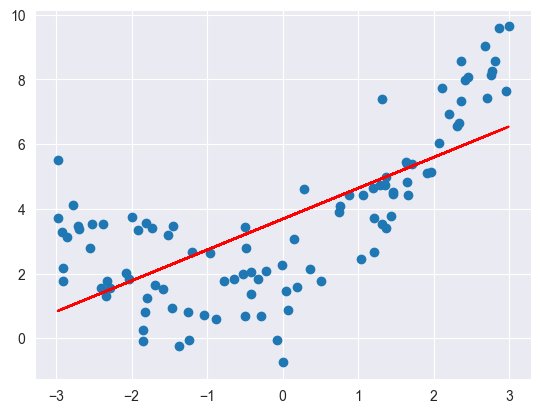

dm01 myret--> 3.0750025765636577


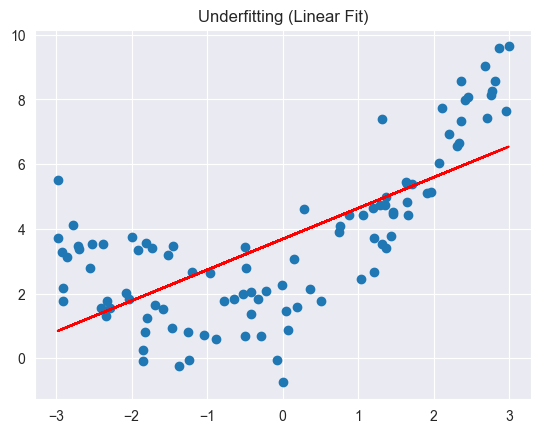

dm02 myret--> 1.0987392142417856


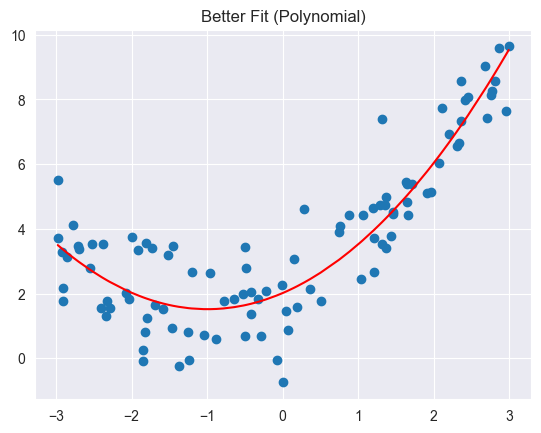

--- 1. 欠拟合示例 ---
dm01_欠拟合 myret--> 3.0750025765636577


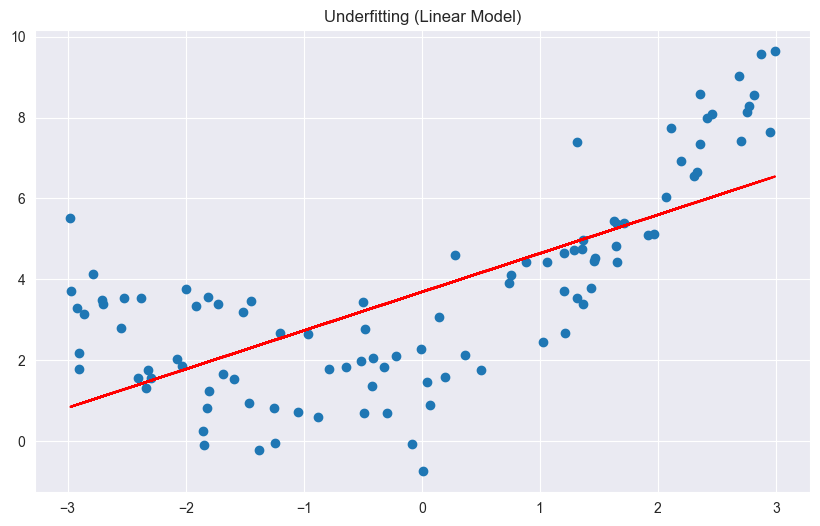


--- 2. 拟合良好示例 ---
dm02_拟合良好 myret--> 1.0987392142417856


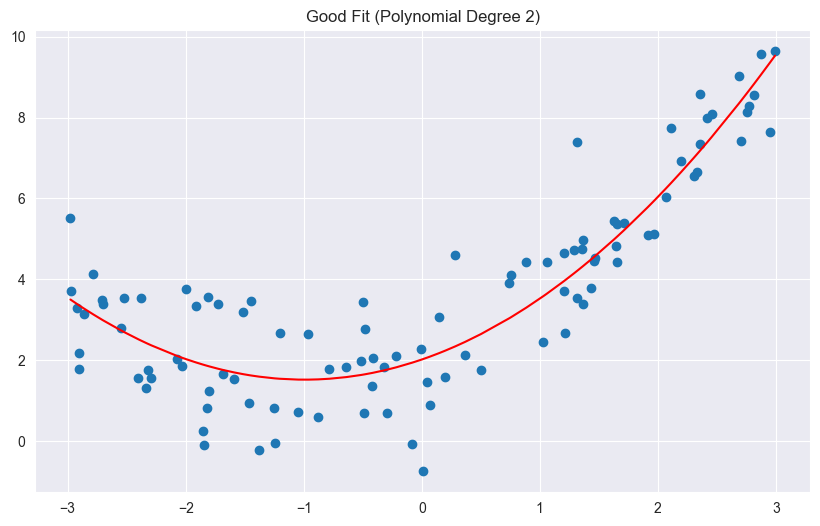


--- 3. 过拟合示例 ---
dm03_过拟合 myret--> 1.0508466763764128


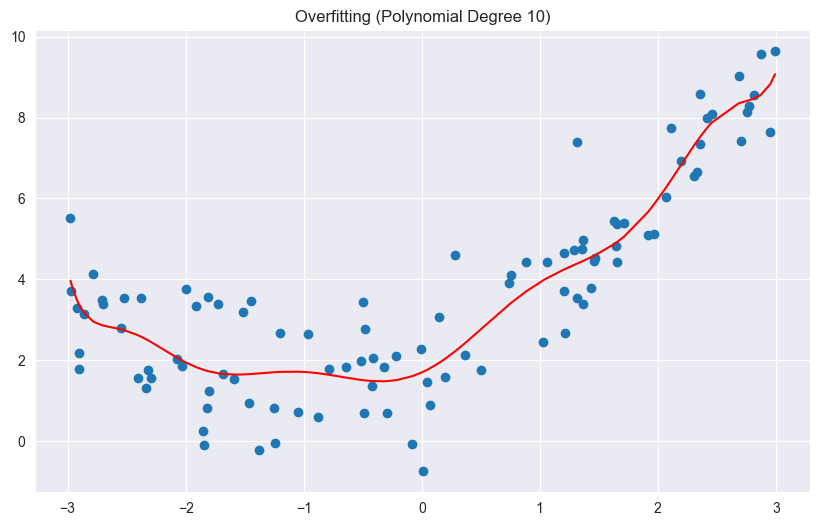

In [85]:
#欠拟合过程
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # 计算均方误差
from sklearn.model_selection import train_test_split

def dm01_under_fitting():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    estimator.fit(X, y)

    # 4 模型预测
    y_predict = estimator.predict(X)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('myret-->', myret)

    # 6 画图
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='r')
    plt.show()
if __name__ == '__main__':
    dm01_under_fitting()





#刚好拟合
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # 计算均方误差
from sklearn.model_selection import train_test_split

def dm01_模型欠拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    # 将x转换为矩阵形式 (100, 1)
    X = x.reshape(-1, 1)
    estimator.fit(X, y)

    # 4 模型预测
    y_predict = estimator.predict(X)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm01 myret-->', myret)

    # 6 画图
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='r')
    plt.title("Underfitting (Linear Fit)")
    plt.show()

def dm02_模型ok():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加二次项，通过 hstack 将 X 和 X^2 拼接
    X2 = np.hstack([X, X ** 2])

    estimator.fit(X2, y)

    # 4 模型预测
    y_predict = estimator.predict(X2)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm02 myret-->', myret)

    # 6 画图
    plt.scatter(x, y)
    # plt.plot(x, y_predict, color='r') # 直接画图会乱，因为x是无序的

    # 画图plot折线图时 需要对x进行排序, 取x排序后对应的y值
    # np.argsort(x) 返回的是排序后的索引
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.title("Better Fit (Polynomial)")
    plt.show()

if __name__ == '__main__':
    # 运行第一个函数：演示欠拟合（直线拟合曲线）
    dm01_模型欠拟合()

    # 运行第二个函数：演示效果较好的模型（引入二次项）
    dm02_模型ok()



















import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # 计算均方误差
from sklearn.model_selection import train_test_split

def dm01_模型欠拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    estimator.fit(X, y)

    # 4 模型预测
    y_predict = estimator.predict(X)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm01_欠拟合 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Underfitting (Linear Model)")
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='r')
    plt.show()

def dm02_模型ok():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加二次项
    X2 = np.hstack([X, X ** 2])
    estimator.fit(X2, y)

    # 4 模型预测
    y_predict = estimator.predict(X2)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm02_拟合良好 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Good Fit (Polynomial Degree 2)")
    plt.scatter(x, y)
    # plt.plot(x, y_predict, color='r')
    # 画图plot折线图时 需要对x进行排序, 取x排序后对应的y值
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

def dm03_模型过拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加高次项 (一直加到10次方)，导致特征过多
    X3 = np.hstack([X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10])
    estimator.fit(X3, y)

    # 4 模型预测
    y_predict = estimator.predict(X3)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm03_过拟合 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Overfitting (Polynomial Degree 10)")
    plt.scatter(x, y)
    # 画图时输入的x数据: 要求是从小到大
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

if __name__ == '__main__':
    # 依次运行三个函数查看效果
    print("--- 1. 欠拟合示例 ---")
    dm01_模型欠拟合()

    print("\n--- 2. 拟合良好示例 ---")
    dm02_模型ok()

    print("\n--- 3. 过拟合示例 ---")
    dm03_模型过拟合()


dm01_欠拟合 myret--> 3.0750025765636577


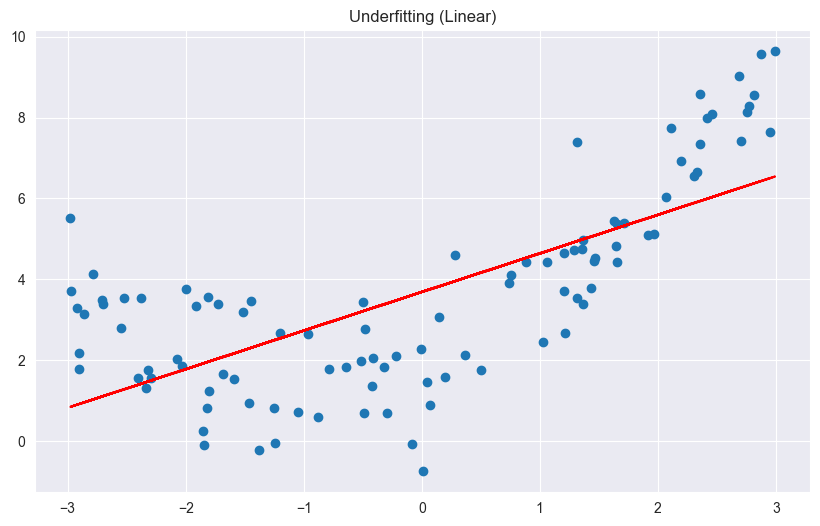

dm02_拟合良好 myret--> 1.0987392142417856


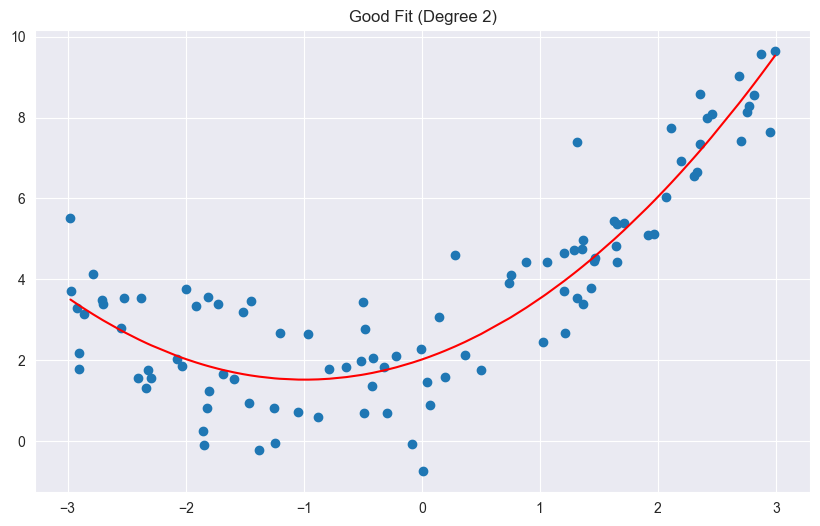

dm03_过拟合 myret--> 1.0508466763764128


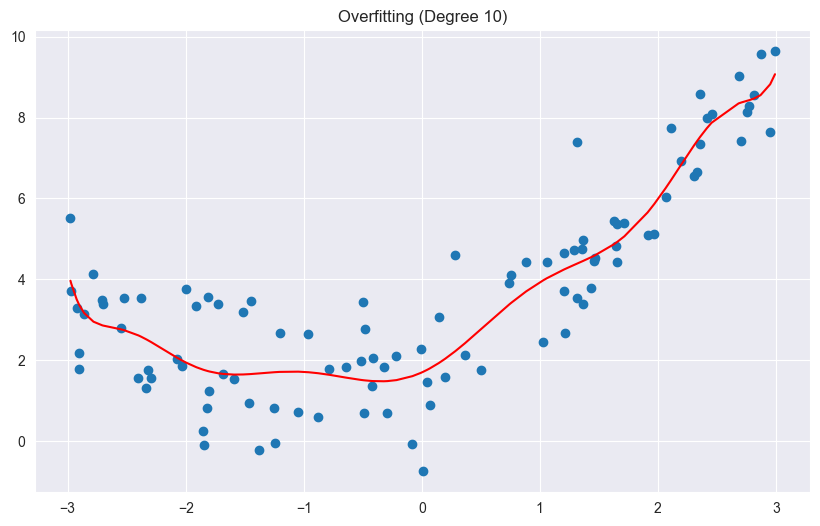

提示: 当前sklearn版本不支持normalize参数，已自动移除
Lasso estimator.coef_ [ 1.05737994e+00  5.97953900e-01 -2.24343406e-02 -1.88302128e-02
  5.65779744e-03  1.40970165e-03  1.59540397e-04 -3.46687066e-05
 -8.98181777e-05 -4.15662577e-06]
dm04_L1正则化 myret--> 1.0799719334340019


D:\tools\XFC\anaconda\envs\PythonProject8\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.116e+01, tolerance: 6.094e-02
  model = cd_fast.enet_coordinate_descent(


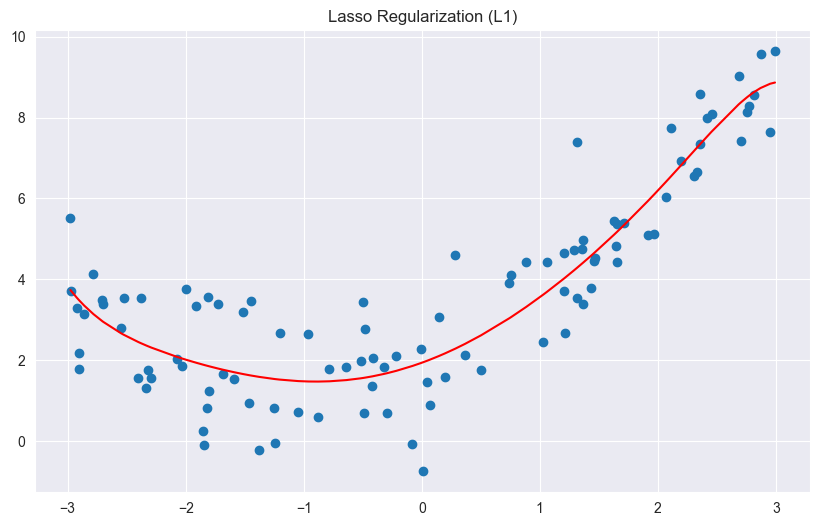

提示: 当前sklearn版本不支持normalize参数，已自动移除
Ridge estimator.coef_ [ 0.19608268  0.09726424  0.17897983  0.09544118  0.08043014  0.01889463
 -0.02244791 -0.00644883  0.00136946  0.00041058]
dm05_L2正则化 myret--> 1.2554495523594393


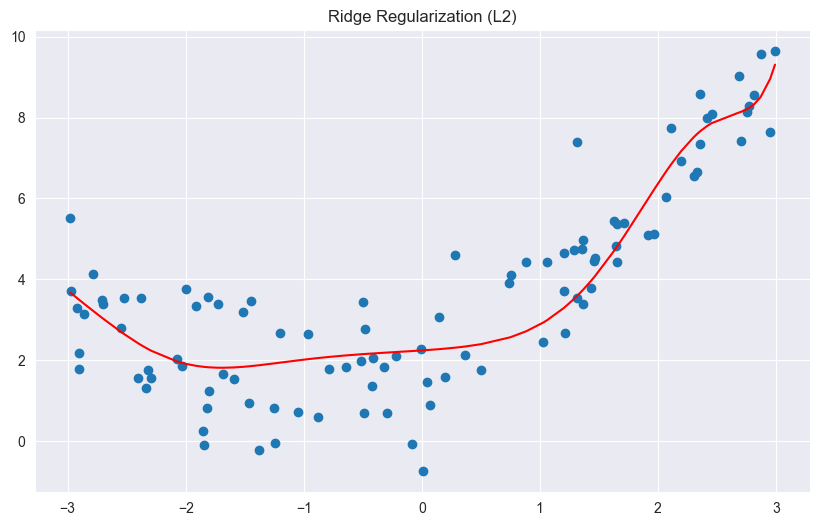

In [92]:
#解决方法 正则化
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error # 计算均方误差
from sklearn.model_selection import train_test_split

def dm01_模型欠拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    estimator.fit(X, y)

    # 4 模型预测
    y_predict = estimator.predict(X)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm01_欠拟合 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Underfitting (Linear)")
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='r') # 注意：这里x未排序，直接画直线没问题，但如果是曲线会乱
    plt.show()

def dm02_模型ok():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加二次项
    X2 = np.hstack([X, X ** 2]) # 数据增加二次项
    estimator.fit(X2, y)

    # 4 模型预测
    y_predict = estimator.predict(X2)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm02_拟合良好 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Good Fit (Degree 2)")
    plt.scatter(x, y)
    # plt.plot(x, y_predict, color='r')
    # 画图plot折线图时 需要对x进行排序, 取x排序后对应的y值
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

def dm03_模型过拟合():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化线性回归模型
    estimator = LinearRegression()

    # 3 训练模型
    X = x.reshape(-1, 1)
    # print('X.shape-->', X.shape)

    # 数据增加高次项 (一直加到10次方)
    X3 = np.hstack([X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10]) # 数据增加高次项
    estimator.fit(X3, y)

    # 4 模型预测
    y_predict = estimator.predict(X3)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm03_过拟合 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Overfitting (Degree 10)")
    plt.scatter(x, y)
    # 画图时输入的x数据: 要求是从小到大
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

def dm04_模型过拟合_L1正则化():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化L1正则化模型 做实验:alpha惩罚力度越来越大k值越来越小,返回会欠拟合
    # 注意: normalize=True 在新版sklearn中已弃用，如果报错请删除该参数
    try:
        estimator = Lasso(alpha=0.005, normalize=True)
    except TypeError:
        print("提示: 当前sklearn版本不支持normalize参数，已自动移除")
        estimator = Lasso(alpha=0.005)

    # 3 训练模型
    X = x.reshape(-1, 1)
    X3 = np.hstack([X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10])
    estimator.fit(X3, y)

    print('Lasso estimator.coef_', estimator.coef_)

    # 4 模型预测
    y_predict = estimator.predict(X3)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm04_L1正则化 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Lasso Regularization (L1)")
    plt.scatter(x, y)
    # 画图时输入的x数据: 要求是从小到大
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

def dm05_模型过拟合_L2正则化():
    # 1 准备数据xy(增加上噪声)
    np.random.seed(666)
    x = np.random.uniform(-3, 3, size=100)
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

    # 2 实例化L2正则化模型
    # 注意: normalize=True 在新版sklearn中已弃用，如果报错请删除该参数
    try:
        estimator = Ridge(alpha=100, normalize=True)
    except TypeError:
        print("提示: 当前sklearn版本不支持normalize参数，已自动移除")
        estimator = Ridge(alpha=100)

    # 3 训练模型
    X = x.reshape(-1, 1)
    X3 = np.hstack([X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10])
    estimator.fit(X3, y)

    print('Ridge estimator.coef_', estimator.coef_)

    # 4 模型预测
    y_predict = estimator.predict(X3)

    # 5 计算均方误差
    myret = mean_squared_error(y, y_predict)
    print('dm05_L2正则化 myret-->', myret)

    # 6 画图
    plt.figure(figsize=(10, 6))
    plt.title("Ridge Regularization (L2)")
    plt.scatter(x, y)
    # 画图时输入的x数据: 要求是从小到大
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
    plt.show()

if __name__ == '__main__':
    # 依次运行查看效果
    dm01_模型欠拟合()
    dm02_模型ok()
    dm03_模型过拟合()
    dm04_模型过拟合_L1正则化()
    dm05_模型过拟合_L2正则化()


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
data=pd.read_csv("C:/Users/王晋华/Desktop/breast-cancer-wisconsin.csv")

data.replace('?',np.nan,inplace=True)
data.dropna(axis=0,inplace=True,ignore_index=True)



#特征工程 提取 预处理
#提取特征与标签
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]
y=data['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)
transformer = StandardScaler()
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)
estimator = LogisticRegression()
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_test)
print(estimator.score(x_test, y_test))
print(accuracy_score(y_test, y_predict))#预测准确率并不能满足各种需求
#要通过混淆矩阵来评测 即：精确率召回率 ROC曲线 AOC值
#精确率：tp/(tp+fn) 召回率：tp/(tp+fn) F1:2*精确率*召回率/（精确率+召回率）
#演示混淆矩阵
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics  import classification_report
y_train=['恶性','恶性','恶性','恶性','恶性','恶性','良性','良性','良性','良性']
y_pre_A=['良性','恶性','良性','良性','恶性','恶性','良性','良性','良性','良性']
y_pre_B=['恶性','恶性','恶性','恶性','恶性','恶性','恶性','恶性','良性','恶性']

label=['恶性','良性']
df_label=['恶性（正例）','良性（反例）']
cm_A=confusion_matrix(y_train, y_pre_A,labels=label)
cm_B=confusion_matrix(y_train, y_pre_B,labels=label)

df_A=pd.DataFrame(cm_A,index=label,columns=df_label)
df_B=pd.DataFrame(cm_B)
print(df_A)
print(df_B)
print(precision_score(y_train, y_pre_A, pos_label='恶性'))
print(recall_score(y_train,y_pre_A,pos_label='恶性'))
print(precision_score(y_train, y_pre_B, pos_label='恶性')
print(classification_report(y_train,y_pre_A,labels=label,target_names=None)))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1834293677.py, line 52)

   Partner_att  Dependents_att  landline  internet_att  internet_other  \
0            1               0         0             1               0   
1            0               0         1             1               0   
2            0               0         1             1               0   
3            0               0         0             1               0   
4            0               0         1             0               1   

   StreamingTV  StreamingMovies  Contract_Month  Contract_1YR  PaymentBank  \
0            0                0               1             0            0   
1            0                0               0             1            0   
2            0                0               1             0            0   
3            0                0               0             1            1   
4            0                0               1             0            0   

   PaymentCreditcard  PaymentElectronic  MonthlyCharges  TotalCharges  \
0            

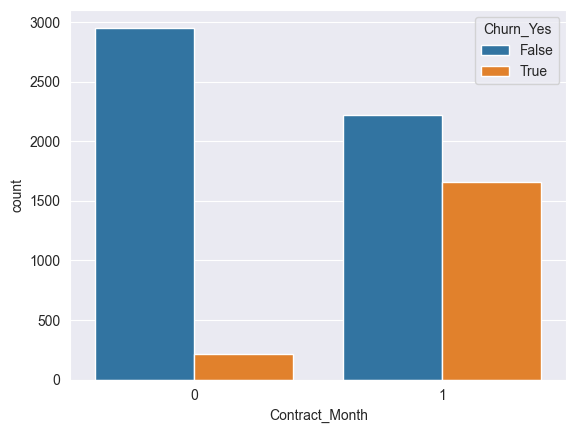

In [59]:
#真实案例
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#1.数据的预处理
def data_processing():
    df=pd.read_csv("C:/Users/王晋华/Desktop/churn.csv")

    df=pd.get_dummies(df,columns=['Churn','gender'])
    df.drop(['Churn_No','gender_Male'],axis=1,inplace=True)
    df.rename(columns={'Churn_Yes':'flag'})
    print(df.head())
    print(df.shape)


#2.数据的可视化
def data_visualization():
    df=pd.read_csv("C:/Users/王晋华/Desktop/churn.csv")

    df=pd.get_dummies(df,columns=['Churn','gender'])
    df.drop(['Churn_No','gender_Male'],axis=1,inplace=True)
    df.rename(columns={'Churn_Yes':'flag'})

    print(df.columns)
    '''
    Index(['Partner_att', 'Dependents_att', 'landline', 'internet_att',)
       'internet_other', 'StreamingTV', 'StreamingMovies', 'Contract_Month',
       'Contract_1YR', 'PaymentBank', 'PaymentCreditcard', 'PaymentElectronic',
       'MonthlyCharges', 'TotalCharges', 'Churn_Yes', 'gender_Female'],
      dtype='object')
      '''
    sns.countplot(data=df,x='Contract_Month',hue='Churn_Yes')
#3.模型训练
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
def logic():
    df=pd.read_csv("C:/Users/王晋华/Desktop/churn.csv")

    df=pd.get_dummies(df,columns=['Churn','gender'])
    df.drop(['Churn_No','gender_Male'],axis=1,inplace=True)
    df.rename(columns={'Churn_Yes':'flag'})
    #提取特征
    x=df[['Contract_Month','internet_other','PaymentElectronic' ]]
    y=df['Churn_Yes']
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)

    estimator = LogisticRegression()
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    print(y_pred)
    print(estimator.score(x_test,y_test))
    print(accuracy_score(y_test,y_pred))

#4.测试

if __name__ == "__main__":
    data_processing()
    data_visualization()
    logic()

决策树

明白条件熵 信息增益 以及信息熵 信息增益率=信息增益/特征熵 1/特征熵就是惩罚系数


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def dm04_泰坦尼克():
    # 1 读数据到内存
    taitan_df = pd.read_csv("./data/titanic/train.csv")
    taitan_df.head()        # 查看前5条数据
    taitan_df.info()         # 查看特性信息

    # 2 数据基本处理
    # 2-1 确定x y
    x = taitan_df[['Pclass', 'Age', 'Sex']]
    y = taitan_df['Survived']

    # 2-2 缺失值处理
    x=x.copy()
    x['Age']=x['Age'].fillna(x['Age'].mean(), inplace=True)

    # 2-3 类别型数据 one-hot编码
    print('x-->1\n', x)
    x.info()
    x = pd.get_dummies(x)
    print('x-->2\n', x)
    x.info()

    # 2-4 数据集划分
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=33)

    # 3 模型训练 - 决策树分类器
    dec_tree = DecisionTreeClassifier(random_state=33)
    dec_tree.fit(x_train, y_train)

    # 4 模型评估
    y_pred = dec_tree.predict(x_test)
    print("="*50)
    print("模型分类评估报告：")
    print(classification_report(y_test, y_pred))

    # 5 决策树可视化展示
    plt.figure(figsize=(12, 8))
    plot_tree(dec_tree, feature_names=x.columns, class_names=['遇难','存活'], filled=True, rounded=True, fontsize=10)
    plt.title('泰坦尼克号生存预测-决策树模型', fontsize=14)
    plt.show()

    # 6 输出特征重要性
    print("="*50)
    print("特征重要性排序：")
    feature_importance = pd.DataFrame({'特征名':x.columns, '重要性':dec_tree.feature_importances_})
    print(feature_importance.sort_values(by='重要性', ascending=False))

# 调用函数执行
if __name__=='__main__':

    dm04_泰坦尼克()

FileNotFoundError: [Errno 2] No such file or directory: './data/titanic/train.csv'

In [1]:
c='0'
print(c+10)

TypeError: can only concatenate str (not "int") to str